<a href="https://colab.research.google.com/github/IamNick25/GC_Optimax_TimeSeries/blob/main/TimeSeries2(Own).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf


df = pd.read_csv("btcusdt_1h_zelta.csv")


df = df.rename(columns={"datetime": "Date"})

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


# Set the 'Date' column as the index of the DataFrame
df = df.set_index('Date')

# Display the first few rows of the DataFrame
df.head()


,open,high,low,close,volume
Date,,,,,
2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199
2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006
2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572
2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030
2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329


In [ ]:
bitcoin_prices=df.copy()
bitcoin_prices=bitcoin_prices.rename(columns={"close": "Price"})
bitcoin_prices.head()

,open,high,low,Price,volume
Date,,,,,
2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199
2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006
2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572
2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030
2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329


In [ ]:
a=len(df)
a

35208

In [ ]:
df.tail()


,open,high,low,close,volume
Date,,,,,
2022-01-12 01:30:00,42972.04,43095.26,42692.19,42800.38,1219.60178
2022-01-12 02:30:00,42797.62,42823.69,42643.74,42659.20,702.10380
2022-01-12 03:30:00,42664.71,42776.14,42597.41,42713.13,561.85993
2022-01-12 04:30:00,42713.12,42886.28,42633.97,42729.29,681.14201
2022-01-12 05:30:00,42729.29,42965.00,42578.02,42675.00,1004.90689


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35208 entries, 2018-01-01 05:30:00 to 2022-01-12 05:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    35208 non-null  float64
 1   high    35208 non-null  float64
 2   low     35208 non-null  float64
 3   close   35208 non-null  float64
 4   volume  35208 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [ ]:
bitcoin_prices.tail()

,open,high,low,Price,volume
Date,,,,,
2022-01-12 01:30:00,42972.04,43095.26,42692.19,42800.38,1219.60178
2022-01-12 02:30:00,42797.62,42823.69,42643.74,42659.20,702.10380
2022-01-12 03:30:00,42664.71,42776.14,42597.41,42713.13,561.85993
2022-01-12 04:30:00,42713.12,42886.28,42633.97,42729.29,681.14201
2022-01-12 05:30:00,42729.29,42965.00,42578.02,42675.00,1004.90689


In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer



# Reshaping data for KMeans
X = bitcoin_prices["Price"].values.reshape(-1, 1)
Y = bitcoin_prices["open"].values.reshape(-1, 1)
Z = bitcoin_prices["high"].values.reshape(-1, 1)
A = bitcoin_prices["low"].values.reshape(-1, 1)
# Creating the KMeans Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(Y)
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(Z)
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(A)


centroids = kmeans.cluster_centers_
distance = np.min(cdist(X, centroids, "euclidean"), axis=1)
centroids1 = kmeans1.cluster_centers_
distance1 = np.min(cdist(Y, centroids1, "euclidean"), axis=1)
centroids2 = kmeans2.cluster_centers_
distance2 = np.min(cdist(Z, centroids2, "euclidean"), axis=1)
centroids3 = kmeans3.cluster_centers_
distance3 = np.min(cdist(A, centroids3, "euclidean"), axis=1)

# Defining the threshold for outliers and identifying them
threshold = np.percentile(distance, 70)
outliers = distance > threshold
threshold1 = np.percentile(distance1, 70)
outliers1 = distance1 > threshold1
threshold2 = np.percentile(distance2, 70)
outliers2 = distance2 > threshold2
threshold3 = np.percentile(distance3, 70)
outliers3 = distance3 > threshold3

# Replacing outliers with NaN
bitcoin_prices.loc[outliers, "Price"] = np.nan
bitcoin_prices.loc[outliers1, "open"] = np.nan
bitcoin_prices.loc[outliers2, "high"] = np.nan
bitcoin_prices.loc[outliers3, "low"] = np.nan

# Calculating the moving average and using it to fill NaN values
bitcoin_prices["Moving_Average"] = bitcoin_prices["Price"].rolling(window=5, min_periods=1).mean()
bitcoin_prices["Price"].fillna(bitcoin_prices["Moving_Average"], inplace=True)
bitcoin_prices["Moving_Average1"] = bitcoin_prices["open"].rolling(window=5, min_periods=1).mean()
bitcoin_prices["open"].fillna(bitcoin_prices["Moving_Average1"], inplace=True)
bitcoin_prices["Moving_Average2"] = bitcoin_prices["high"].rolling(window=5, min_periods=1).mean()
bitcoin_prices["high"].fillna(bitcoin_prices["Moving_Average2"], inplace=True)
bitcoin_prices["Moving_Average3"] = bitcoin_prices["low"].rolling(window=5, min_periods=1).mean()
bitcoin_prices["low"].fillna(bitcoin_prices["Moving_Average3"], inplace=True)

# Forward fill to handle NaN values at the start
bitcoin_prices["Price"].fillna(method='ffill', inplace=True)
bitcoin_prices["open"].fillna(method='ffill', inplace=True)
bitcoin_prices["high"].fillna(method='ffill', inplace=True)
bitcoin_prices["low"].fillna(method='ffill', inplace=True)

# Backward fill to handle NaN values at the end
bitcoin_prices["Price"].fillna(method='bfill', inplace=True)
bitcoin_prices["open"].fillna(method='bfill', inplace=True)
bitcoin_prices["high"].fillna(method='bfill', inplace=True)
bitcoin_prices["low"].fillna(method='bfill', inplace=True)

# Clean up: Remove the temporary 'Moving_Average' column if no longer needed
bitcoin_prices.drop(columns=['Moving_Average'], inplace=True)
bitcoin_prices.drop(columns=['Moving_Average1'], inplace=True)
bitcoin_prices.drop(columns=['Moving_Average2'], inplace=True)
bitcoin_prices.drop(columns=['Moving_Average3'], inplace=True)

'''imputer=KNNImputer(n_neighbors=8)

# Applying KNN imputation
imputed_data = imputer.fit_transform(bitcoin_prices[['Price', 'open', 'high', 'low']])
bitcoin_prices_imputed_df = pd.DataFrame(imputed_data, columns=['Price', 'open', 'high', 'low'])

# Replacing the original DataFrame with the imputed one
bitcoin_prices.reset_index(drop=True, inplace=True)
bitcoin_prices[['Price', 'open', 'high', 'low']] = bitcoin_prices_imputed_df

print(imputed_data)
print(bitcoin_prices_imputed_df.head())'''


print(bitcoin_prices["Price"].isna().sum())
print(bitcoin_prices["open"].isna().sum())
print(bitcoin_prices["high"].isna().sum())
print(bitcoin_prices["low"].isna().sum())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0
0
0
0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


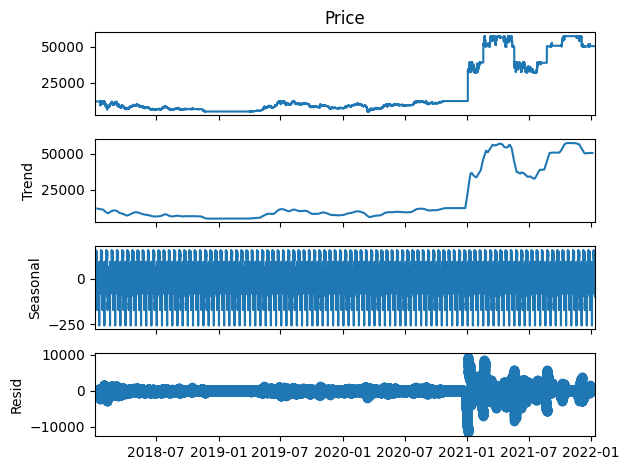

In [ ]:
# Using seasoning to visualise better and keeping a year as a season
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(bitcoin_prices['Price'], model='additive', period=365)  # adjust the period based on your data's frequency

# Plotting the decomposition
fig = decomposition.plot()
plt.show()

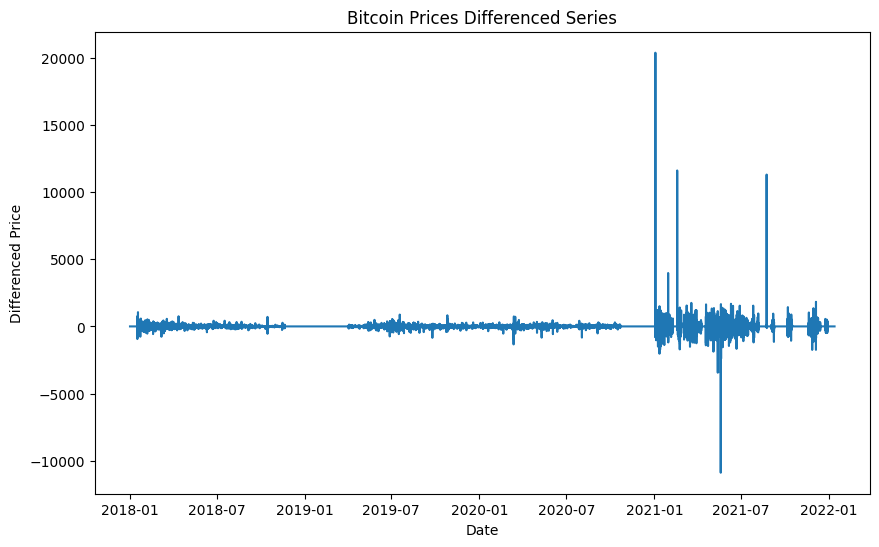

0


In [ ]:
# Using Differencing
bitcoin_prices['Price_Diff'] = bitcoin_prices['Price'].diff().fillna(0)


# Dropping NaN values that are created as a result of differencing
bitcoin_prices.dropna(inplace=True)
# Plotting the differenced series
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_prices['Price_Diff'])
plt.title('Bitcoin Prices Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.show()
print(bitcoin_prices["Price"].isna().sum())
bitcoin_prices.drop(columns=['Price_Diff'], inplace=True)

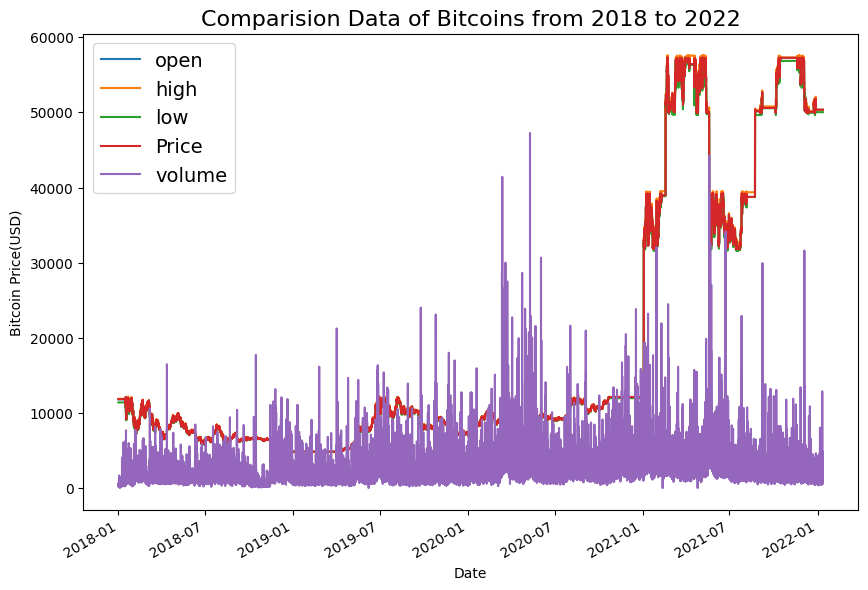

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("Bitcoin Price(USD)")
plt.title("Comparision Data of Bitcoins from 2018 to 2022", fontsize=16)
plt.legend(fontsize=14)

In [ ]:
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices[["Price","open","high","low"]].to_numpy()
timesteps[:10],prices[:10]

(array(['2018-01-01T05:30:00.000000000', '2018-01-01T06:30:00.000000000',
        '2018-01-01T07:30:00.000000000', '2018-01-01T08:30:00.000000000',
        '2018-01-01T09:30:00.000000000', '2018-01-01T10:30:00.000000000',
        '2018-01-01T11:30:00.000000000', '2018-01-01T12:30:00.000000000',
        '2018-01-01T13:30:00.000000000', '2018-01-01T14:30:00.000000000'],
       dtype='datetime64[ns]'),
 array([[11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ]]))

In [ ]:
# Splitting the train and test data using indexing

split_size=int(0.8*(len(prices)))
X_train,Y_train=timesteps[:split_size],prices[:split_size]
X_test,Y_test=timesteps[split_size:],prices[split_size:]

a=len(X_train);b=len(Y_train);c=len(X_test);d=len(Y_test);
a,b,c,d

(28166, 28166, 7042, 7042)

ValueError: x and y must be the same size

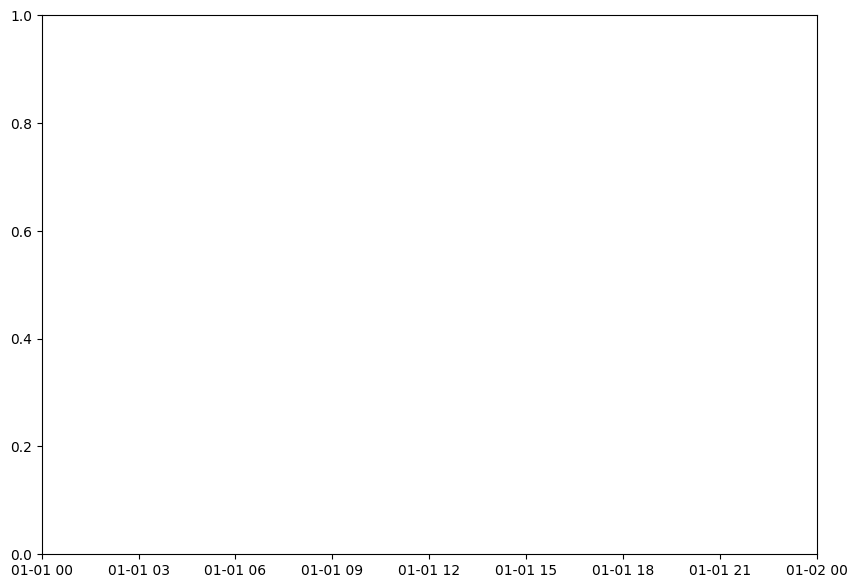

In [ ]:
# Making a desirable train test split to avoid shuffling of test data in between train data for future simulations

plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train,s=5,label="New Train data")
plt.scatter(X_test,Y_test,s=5,label="New test data")
plt.xlabel("Date")
plt.ylabel("BTC_Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Date")
  plt.ylabel("BTC_Price")
  if label:
    plt.legend(fontsize=14) # To make the label bigger
  plt.grid(True)

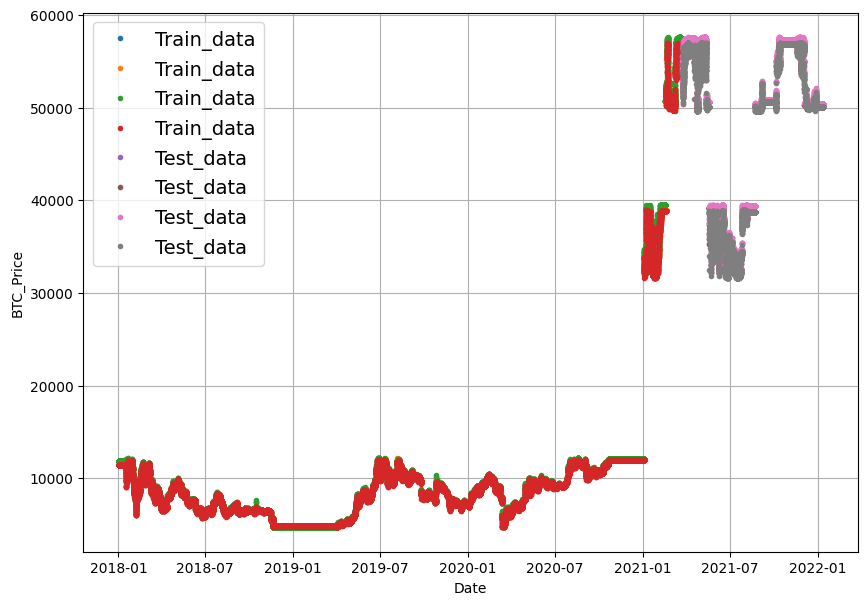

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=Y_train, label="Train_data")
plot_time_series(timesteps=X_test, values=Y_test, label="Test_data")

In [ ]:
#Creating a naive forecast
naive_forecast=Y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([[54122.07, 54350.54, 54580.  , 53966.89],
        [54100.  , 54127.12, 54294.82, 53783.23],
        [54662.79, 54100.  , 55000.  , 53700.  ],
        [55464.2 , 54661.64, 55612.92, 54606.  ],
        [56280.41, 55464.46, 56400.13, 55452.14],
        [56404.73, 56280.4 , 56662.08, 56280.4 ],
        [56465.75, 56405.11, 56592.85, 56028.  ],
        [56541.03, 56465.74, 56600.54, 56256.51],
        [56900.01, 56536.08, 57038.31, 56536.08],
        [56759.91, 56900.  , 57200.  , 56368.42]]),
 array([[41642.  , 41700.74, 41823.01, 41268.93],
        [41733.93, 41639.51, 42200.  , 41440.69],
        [42705.24, 41733.92, 42925.07, 41680.44],
        [42549.01, 42705.24, 43100.  , 42319.24],
        [42755.  , 42549.01, 42916.97, 42353.07],
        [42972.05, 42754.99, 43086.7 , 42595.68],
        [42800.38, 42972.04, 43095.26, 42692.19],
        [42659.2 , 42797.62, 42823.69, 42643.74],
        [42713.13, 42664.71, 42776.14, 42597.41],
        [42729.29, 42713.12, 42886.28, 42633.97]

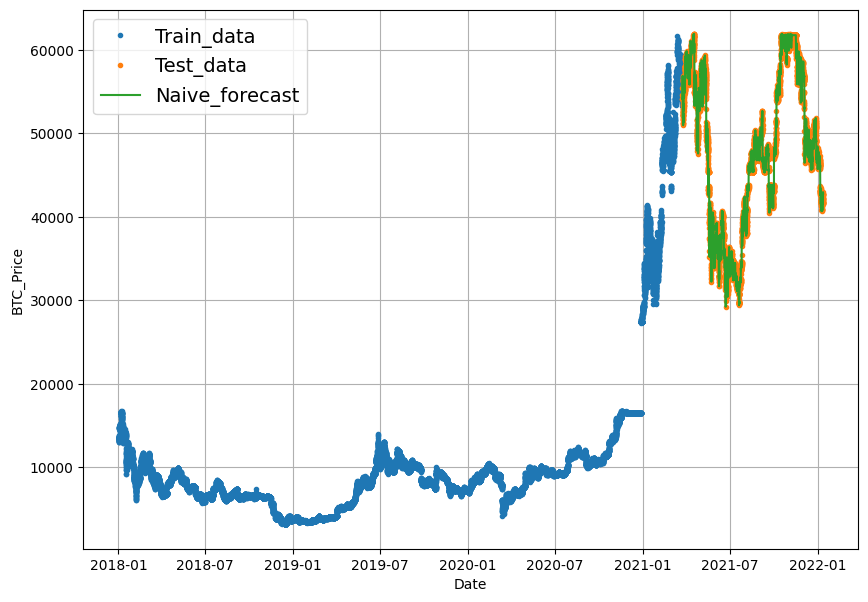

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=Y_train,label="Train_data")
plot_time_series(timesteps=X_test,values=Y_test,label="Test_data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format="-",label="Naive_forecast")

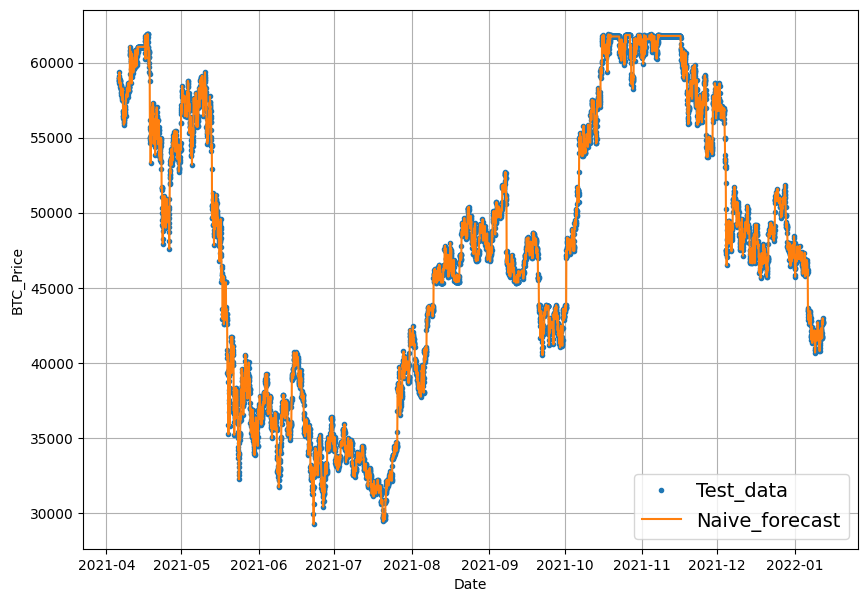

In [ ]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=X_test,values=Y_test,start=offset,label="Test_data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,start=offset,format="-",label="Naive_forecast")

In [ ]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true,y_pred):
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_season

In [ ]:
def evaluate_preds(y_true,y_pred):
  y_true=tf.cast(y_true, dtype=tf.float32)
  y_pred=tf.cast(y_pred, dtype=tf.float32)

  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  # Accounting for different sized metrics,i.e,
#  if mae is not in its scalar form we can reduce it to one by aggregating across the entire horizon array
  if mae.ndim>0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rmse=tf.reduce_mean(rmse)
    mape=tf.reduce_mean(mape)
    mase=tf.reduce_mean(mase)


  return{"mae": mae.numpy(),
         "mse": mse.numpy(),
         "rmse": rmse.numpy(),
         "mape": mape.numpy(),
         "mase": mase.numpy()}

In [ ]:
naive_results=evaluate_preds(y_true=Y_test[1:],y_pred=Y_test[:-1])
naive_results

{'mae': 105.91416,
 'mse': 92501.51,
 'rmse': 125.320145,
 'mape': 0.24519458,
 'mase': 1.0000975}

In [ ]:
Y_test

array([[54122.07, 54350.54, 54580.  , 53966.89],
       [54100.  , 54127.12, 54294.82, 53783.23],
       [54662.79, 54100.  , 55000.  , 53700.  ],
       ...,
       [50350.23, 50350.22, 50350.23, 50029.62],
       [50350.23, 50350.22, 50350.23, 50029.62],
       [50350.23, 50350.22, 50350.23, 50029.62]])

In [ ]:
HORIZON=1; # Predict one step at a time
WINDOW_SIZE=7 #vTake 7 days to predict the next day output

In [ ]:
def get_labelled_windows(x,horizon=1):
  return x[:,:-horizon], x[:,-horizon:]

In [ ]:
test_window, test_label=get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0),horizon=HORIZON)
print(f"Window:{tf.squeeze(test_window).numpy()}->Label:{tf.squeeze(test_label).numpy()}")

Window:[1 2 3 4 5 6 7]->Label:8


In [ ]:
import numpy as np

# Turning a 1D array into a 2D array of sequential window size (Sliding window technique)
def make_windows(x, window_size=7, horizon=1):
  window_step= np.expand_dims(np.arange(window_size+horizon),axis=0) # Create a window of specific window_size
  window_indexes=window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T # To account for 0 index
  windowed_array=x[window_indexes]#Create the step windowed array

  windows,labels=get_labelled_windows(windowed_array,horizon=horizon)
  return windows, labels

In [ ]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
print(len(full_windows))
print(len(full_labels))

35201
35201


In [ ]:
n=3
for i in range(n):
  print(f"full_window:{full_windows[i]}--> label:{full_labels[i]}")

full_window:[[13529.01 13715.65 13715.65 13400.01]
 [13203.06 13528.99 13595.89 13155.38]
 [13330.18 13203.   13418.43 13200.  ]
 [13410.03 13330.26 13611.27 13290.  ]
 [13601.01 13434.98 13623.29 13322.15]
 [13558.99 13615.2  13699.   13526.5 ]
 [13780.41 13539.   13800.   13510.  ]]--> label:[[13570.35 13780.   13818.55 13555.02]]
full_window:[[13203.06 13528.99 13595.89 13155.38]
 [13330.18 13203.   13418.43 13200.  ]
 [13410.03 13330.26 13611.27 13290.  ]
 [13601.01 13434.98 13623.29 13322.15]
 [13558.99 13615.2  13699.   13526.5 ]
 [13780.41 13539.   13800.   13510.  ]
 [13570.35 13780.   13818.55 13555.02]]--> label:[[13499.99 13569.98 13735.24 13400.  ]]
full_window:[[13330.18 13203.   13418.43 13200.  ]
 [13410.03 13330.26 13611.27 13290.  ]
 [13601.01 13434.98 13623.29 13322.15]
 [13558.99 13615.2  13699.   13526.5 ]
 [13780.41 13539.   13800.   13510.  ]
 [13570.35 13780.   13818.55 13555.02]
 [13499.99 13569.98 13735.24 13400.  ]]--> label:[[13616.99 13499.97 13670.   13459.

In [ ]:
for i in range(3):
  print(f"full_window:{full_windows[i-3]}--> label:{full_labels[i-3]}")

full_window:[[41733.93 41639.51 42200.   41440.69]
 [42705.24 41733.92 42925.07 41680.44]
 [42549.01 42705.24 43100.   42319.24]
 [42755.   42549.01 42916.97 42353.07]
 [42972.05 42754.99 43086.7  42595.68]
 [42800.38 42972.04 43095.26 42692.19]
 [42659.2  42797.62 42823.69 42643.74]]--> label:[[42713.13 42664.71 42776.14 42597.41]]
full_window:[[42705.24 41733.92 42925.07 41680.44]
 [42549.01 42705.24 43100.   42319.24]
 [42755.   42549.01 42916.97 42353.07]
 [42972.05 42754.99 43086.7  42595.68]
 [42800.38 42972.04 43095.26 42692.19]
 [42659.2  42797.62 42823.69 42643.74]
 [42713.13 42664.71 42776.14 42597.41]]--> label:[[42729.29 42713.12 42886.28 42633.97]]
full_window:[[42549.01 42705.24 43100.   42319.24]
 [42755.   42549.01 42916.97 42353.07]
 [42972.05 42754.99 43086.7  42595.68]
 [42800.38 42972.04 43095.26 42692.19]
 [42659.2  42797.62 42823.69 42643.74]
 [42713.13 42664.71 42776.14 42597.41]
 [42729.29 42713.12 42886.28 42633.97]]--> label:[[42675.   42729.29 42965.   42578.

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
  bitcoin_prices_windowed[f"open+{i+1}"]=bitcoin_prices_windowed["open"].shift(periods=i+1)
  bitcoin_prices_windowed[f"high+{i+1}"]=bitcoin_prices_windowed["high"].shift(periods=i+1)
  bitcoin_prices_windowed[f"low+{i+1}"]=bitcoin_prices_windowed["low"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,open,high,low,Price,volume,Price+1,open+1,high+1,low+1,Price+2,...,high+5,low+5,Price+6,open+6,high+6,low+6,Price+7,open+7,high+7,low+7
0,13715.65,13715.65,13400.01,13529.01,443.356199,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13528.99,13595.89,13155.38,13203.06,383.697006,13529.01,13715.65,13715.65,13400.01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13203.00,13418.43,13200.00,13330.18,429.064572,13203.06,13528.99,13595.89,13155.38,13529.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13330.26,13611.27,13290.00,13410.03,420.087030,13330.18,13203.00,13418.43,13200.00,13203.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13434.98,13623.29,13322.15,13601.01,340.807329,13410.03,13330.26,13611.27,13290.00,13330.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13615.20,13699.00,13526.50,13558.99,404.229046,13601.01,13434.98,13623.29,13322.15,13410.03,...,13715.65,13400.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13539.00,13800.00,13510.00,13780.41,264.989684,13558.99,13615.20,13699.00,13526.50,13601.01,...,13595.89,13155.38,13529.01,13715.65,13715.65,13400.01,NaN,NaN,NaN,NaN
7,13780.00,13818.55,13555.02,13570.35,292.188777,13780.41,13539.00,13800.00,13510.00,13558.99,...,13418.43,13200.00,13203.06,13528.99,13595.89,13155.38,13529.01,13715.65,13715.65,13400.01
8,13569.98,13735.24,13400.00,13499.99,271.813553,13570.35,13780.00,13818.55,13555.02,13780.41,...,13611.27,13290.00,13330.18,13203.00,13418.43,13200.00,13203.06,13528.99,13595.89,13155.38
9,13499.97,13670.00,13459.11,13616.99,213.095829,13499.99,13569.98,13735.24,13400.00,13570.35,...,13623.29,13322.15,13410.03,13330.26,13611.27,13290.00,13330.18,13203.00,13418.43,13200.00


In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
Y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,open,high,low,volume,Price+1,open+1,high+1,low+1,Price+2,open+2,...,high+5,low+5,Price+6,open+6,high+6,low+6,Price+7,open+7,high+7,low+7
7,13780.000000,13818.549805,13555.019531,292.188782,13780.410156,13539.000000,13800.000000,13510.000000,13558.990234,13615.200195,...,13418.429688,13200.000000,13203.059570,13528.990234,13595.889648,13155.379883,13529.009766,13715.650391,13715.650391,13400.009766
8,13569.980469,13735.240234,13400.000000,271.813568,13570.349609,13780.000000,13818.549805,13555.019531,13780.410156,13539.000000,...,13611.269531,13290.000000,13330.179688,13203.000000,13418.429688,13200.000000,13203.059570,13528.990234,13595.889648,13155.379883
9,13499.969727,13670.000000,13459.110352,213.095825,13499.990234,13569.980469,13735.240234,13400.000000,13570.349609,13780.000000,...,13623.290039,13322.150391,13410.030273,13330.259766,13611.269531,13290.000000,13330.179688,13203.000000,13418.429688,13200.000000
10,13632.000000,13657.919922,13497.980469,169.512192,13616.990234,13499.969727,13670.000000,13459.110352,13499.990234,13569.980469,...,13699.000000,13526.500000,13601.009766,13434.980469,13623.290039,13322.150391,13410.030273,13330.259766,13611.269531,13290.000000
11,13573.000000,13589.889648,13001.129883,665.334351,13570.009766,13632.000000,13657.919922,13497.980469,13616.990234,13499.969727,...,13800.000000,13510.000000,13558.990234,13615.200195,13699.000000,13526.500000,13601.009766,13434.980469,13623.290039,13322.150391


In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):

  split_size=int(len(windows)*(1-test_split))

  train_windows = windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows, train_labels, test_windows, test_labels

In [ ]:
train_windows,train_labels,test_windows,test_labels= make_train_test_splits(X,Y)
print(len(train_windows),len(train_labels),len(test_windows),len(test_labels))

28166 28166 7042 7042


In [ ]:
train_windows[:5],train_labels[:5]

(            open          high           low      volume       Price+1  \
 7   13780.000000  13818.549805  13555.019531  292.188782  13780.410156   
 8   13569.980469  13735.240234  13400.000000  271.813568  13570.349609   
 9   13499.969727  13670.000000  13459.110352  213.095825  13499.990234   
 10  13632.000000  13657.919922  13497.980469  169.512192  13616.990234   
 11  13573.000000  13589.889648  13001.129883  665.334351  13570.009766   
 
           open+1        high+1         low+1       Price+2        open+2  ...  \
 7   13539.000000  13800.000000  13510.000000  13558.990234  13615.200195  ...   
 8   13780.000000  13818.549805  13555.019531  13780.410156  13539.000000  ...   
 9   13569.980469  13735.240234  13400.000000  13570.349609  13780.000000  ...   
 10  13499.969727  13670.000000  13459.110352  13499.990234  13569.980469  ...   
 11  13632.000000  13657.919922  13497.980469  13616.990234  13499.969727  ...   
 
           high+5         low+5       Price+6        o

In [ ]:
train_windows,train_labels,test_windows,test_labels= make_train_test_splits(full_windows,full_labels)
train_windows[:5]

array([[[11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ]],

       [[11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ]],

       [[11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400.  ],
        [11838.66, 11807.46, 11884.81, 11400. 

In [ ]:
# Modelling a checkpoint for callbacks
# If at epoch e.x: 55, model shows best performance and initial epoch is set at 100, then it is retrieved early to avoid overfitting issues
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),#Create filepath to save model
                                            verbose=0, # To get limited amount of text
                                            save_best_only=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    layers.Dense(12,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
], name="model_1_Dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=300,
            verbose=1,
            validation_data=(test_windows, test_labels),
            batch_size=128,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 1/300
220/220 [==============================] - 2s 4ms/step - loss: 2879.3660 - mae: 2879.3669 - val_loss: 326.3583 - val_mae: 326.3583 - lr: 0.0010
Epoch 2/300
220/220 [==============================] - 1s 3ms/step - loss: 112.0323 - mae: 112.0324 - val_loss: 326.3768 - val_mae: 326.3768 - lr: 0.0010
Epoch 3/300
220/220 [==============================] - 1s 3ms/step - loss: 111.9481 - mae: 111.9481 - val_loss: 327.5803 - val_mae: 327.5804 - lr: 0.0010
Epoch 4/300
220/220 [==============================] - 1s 3ms/step - loss: 111.9803 - mae: 111.9804 - val_loss: 327.5420 - val_mae: 327.5420 - lr: 0.0010
Epoch 5/300
220/220 [==============================] - 1s 3ms/step - loss: 112.0773 - mae: 112.0773 - val_loss: 326.0460 - val_mae: 326.0459 - lr: 0.0010
Epoch 6/300
220/220 [==============================] - 1s 3ms/step - loss: 111.4620 - mae: 111.4620 - val_loss: 353.7218 - val_mae: 353.7217 - lr: 0.0010
Epoch 7/300
220/220 [==============================] - 1s 3ms/step - loss:


KeyboardInterrupt



In [ ]:
model_1.evaluate(test_windows,test_labels)

221/221 [==============================] - 0s 2ms/step - loss: 215.2837 - mae: 215.2837


[215.28369140625, 215.28369140625]

In [ ]:
model_1=tf.keras.models.load_model("/content/model_experiments/model_1_Dense")
model_1.evaluate(test_windows,test_labels)

OSError: No file or directory found at /content/model_experiments/model_1_Dense

In [ ]:
def make_preds(model,input_data):

  #input_data is the windowed data
  forecast=model.predict(input_data)
  return tf.squeeze(forecast) # To make it into a 1D array of forecast format

In [ ]:
model_1_preds=make_preds(model_1,test_windows)

print(len(model_1_preds))
print(model_1_preds[:10])

221/221 [==============================] - 0s 1ms/step
7041
tf.Tensor(
[54025.723 54187.125 54762.574 55669.56  56181.42  56376.582 56266.95
 56596.707 56946.97  56975.684], shape=(10,), dtype=float32)


In [ ]:
model_1_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_1_preds)
model_1_results

{'mae': 281.33563,
 'mse': 405607.88,
 'rmse': 636.87354,
 'mape': 0.72298527,
 'mase': 0.375635}

In [ ]:
naive_results

{'mae': 740.9474,
 'mse': 18459564.0,
 'rmse': 775.83997,
 'mape': 2.4639602,
 'mase': 0.9998923}

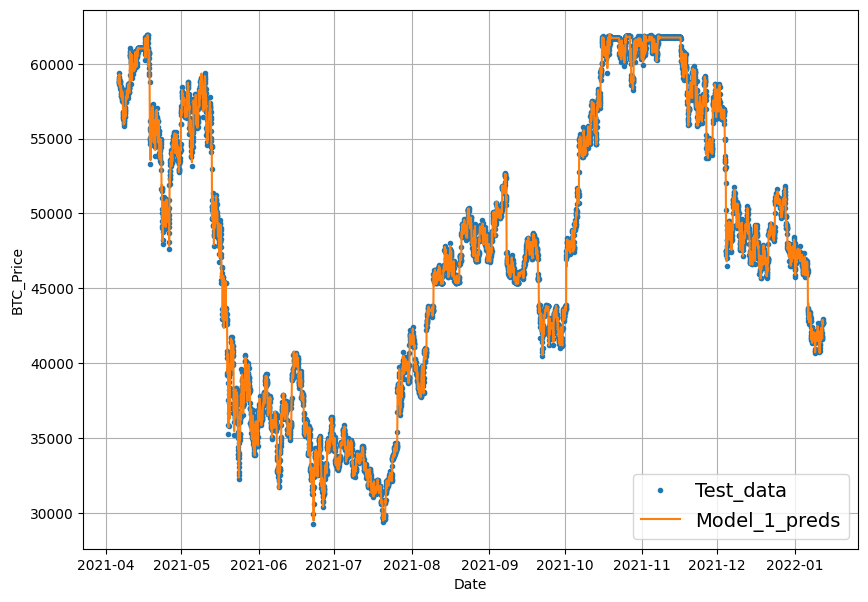

In [ ]:
# Visualising the model and comparing with test data
offset=300
plt.figure(figsize=(10,7))

plot_time_series(timesteps= X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test_data")
plot_time_series(timesteps= X_test[-len(test_windows):], values=model_1_preds, start=offset,format="-", label="Model_1_preds")

In [ ]:
HORIZON=1
WINDOW_SIZE=30

In [ ]:
full_windows, full_labels= make_windows(prices,window_size=WINDOW_SIZE, horizon=HORIZON)
print(len(full_windows), len(full_labels))
full_windows[:5], full_labels[:5]

35178 35178


(array([[13529.01, 13203.06, 13330.18, 13410.03, 13601.01, 13558.99,
         13780.41, 13570.35, 13499.99, 13616.99, 13570.01, 13220.56,
         13172.42, 13017.  , 13211.39, 13247.  , 13018.  , 13022.  ,
         13135.  , 13240.37, 13399.24, 13481.01, 13452.  , 13380.  ,
         13750.01, 13600.  , 13522.  , 13353.78, 13127.31, 13166.95],
        [13203.06, 13330.18, 13410.03, 13601.01, 13558.99, 13780.41,
         13570.35, 13499.99, 13616.99, 13570.01, 13220.56, 13172.42,
         13017.  , 13211.39, 13247.  , 13018.  , 13022.  , 13135.  ,
         13240.37, 13399.24, 13481.01, 13452.  , 13380.  , 13750.01,
         13600.  , 13522.  , 13353.78, 13127.31, 13166.95, 13255.98],
        [13330.18, 13410.03, 13601.01, 13558.99, 13780.41, 13570.35,
         13499.99, 13616.99, 13570.01, 13220.56, 13172.42, 13017.  ,
         13211.39, 13247.  , 13018.  , 13022.  , 13135.  , 13240.37,
         13399.24, 13481.01, 13452.  , 13380.  , 13750.01, 13600.  ,
         13522.  , 13353.78, 131

In [ ]:
train_windows, train_labels,test_windows, test_labels=make_train_test_splits(windows=full_windows, labels=full_labels)
print(len(train_windows),len(test_windows),len(train_labels),len(test_labels))

28142 7036 28142 7036


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

#Building the model
model_2=tf.keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_2_dense")

#Compiling the model

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"])
# Fitting the model

model_2.fit(x=train_windows,
            y=train_labels,
            epochs=400,
            validation_data=(test_windows,test_labels),
            batch_size=128,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 1/400
220/220 [==============================] - 5s 20ms/step - loss: 659.5534 - mae: 659.5534 - val_loss: 2377.2256 - val_mae: 2377.2256
Epoch 2/400
220/220 [==============================] - 5s 24ms/step - loss: 241.1449 - mae: 241.1449 - val_loss: 1706.6106 - val_mae: 1706.6106
Epoch 3/400
220/220 [==============================] - 4s 19ms/step - loss: 260.3117 - mae: 260.3117 - val_loss: 712.0946 - val_mae: 712.0946
Epoch 4/400
220/220 [==============================] - 4s 18ms/step - loss: 238.4181 - mae: 238.4181 - val_loss: 1327.8252 - val_mae: 1327.8252
Epoch 5/400
220/220 [==============================] - 4s 19ms/step - loss: 204.8202 - mae: 204.8202 - val_loss: 803.0441 - val_mae: 803.0441
Epoch 6/400
220/220 [==============================] - 4s 17ms/step - loss: 160.4188 - mae: 160.4188 - val_loss: 1491.6550 - val_mae: 1491.6550
Epoch 7/400
220/220 [==============================] - 6s 27ms/step - loss: 189.1707 - mae: 189.1707 - val_loss: 1349.0027 - val_mae: 1349.0

In [ ]:
model_2.evaluate(test_windows,test_labels)

221/221 [==============================] - 1s 4ms/step - loss: 354.1612 - mae: 354.1612


[354.1611633300781, 354.1611633300781]

In [ ]:
model_2=tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows,test_labels)

221/221 [==============================] - 1s 5ms/step - loss: 168.3732 - mae: 168.3732


[168.3732452392578, 168.3732452392578]

In [ ]:
model_2_preds=make_preds(model=model_2,
                         input_data=test_windows)


221/221 [==============================] - 1s 5ms/step


In [ ]:
model_2_preds.shape, test_labels.shape # We have to squeeze the dimensions of test labels to compare them with model_2_preds or just squeeze them to 1D array

(TensorShape([7041]), (7041,))

In [ ]:
model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_2_preds)
model_2_results

{'mae': 168.3732,
 'mse': 73434.46,
 'rmse': 270.98795,
 'mape': 0.41423067,
 'mase': 0.22480929}

In [ ]:
naive_results

{'mae': 225.53049,
 'mse': 133284.8,
 'rmse': 262.58426,
 'mape': 0.493226,
 'mase': 0.99997044}

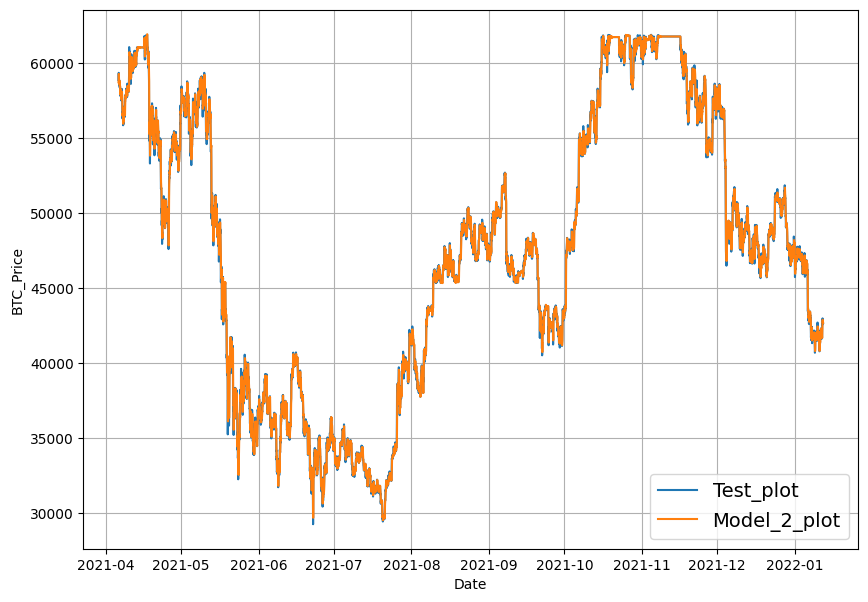

In [ ]:
# Visualising the model
offset=300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset,format="-", label="Test_plot")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="Model_2_plot")

In [ ]:
WINDOW_SIZE=30
HORIZON=7

In [ ]:
# Making the windowed data first by sliding window technique

full_windows, full_labels= make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(35172, 35172)

In [ ]:
# Now making the training and test split

train_windows, train_labels, test_windows, test_labels= make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels)

print(len(train_windows),len(train_labels),len(test_windows),len(test_labels))

28137 28137 7035 7035


In [ ]:
# Now making the model_3

import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_3= tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_3_dense")

# Compiling the  model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#Fitting the model
model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            validation_data=(test_windows,test_labels),
            batch_size=128,
            verbose=True,
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
220/220 [==============================] - 2s 6ms/step - loss: 129318879410264740408066048.0000 - mae: 129318879410264740408066048.0000 - val_loss: 39570.1484 - val_mae: 39570.1484
Epoch 2/100
220/220 [==============================] - 1s 5ms/step - loss: 4727.3032 - mae: 4727.3032 - val_loss: 39348.4648 - val_mae: 39348.4648
Epoch 3/100
220/220 [==============================] - 1s 4ms/step - loss: 4727.3804 - mae: 4727.3804 - val_loss: 39742.8047 - val_mae: 39742.8047
Epoch 4/100
220/220 [==============================] - 1s 3ms/step - loss: 4724.9077 - mae: 4724.9077 - val_loss: 39603.8477 - val_mae: 39603.8477
Epoch 5/100
220/220 [==============================] - 1s 6ms/step - loss: 4728.3770 - mae: 4728.3770 - val_loss: 39211.2109 - val_mae: 39211.2109
Epoch 6/100
220/220 [==============================] - 1s 3ms/step - loss: 4728.2544 - mae: 4728.2544 - val_loss: 39518.5352 - val_mae: 39518.5352
Epoch 7/100
220/220 [==============================] - 1s 5ms/step - los

In [ ]:
model_3=tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows,test_labels)

220/220 [==============================] - 1s 2ms/step - loss: 38639.0664 - mae: 38639.0664


[38639.06640625, 38639.06640625]

In [ ]:
model_3_preds=make_preds(model=model_3,
                         input_data=test_windows)
model_3_results=evaluate_preds(y_true=test_labels,
                               y_pred=model_3_preds)
model_3_results

220/220 [==============================] - 0s 2ms/step


{'mae': 38639.05,
 'mse': 1580277600.0,
 'rmse': 38641.1,
 'mape': 79.6449,
 'mase': 165.26349}

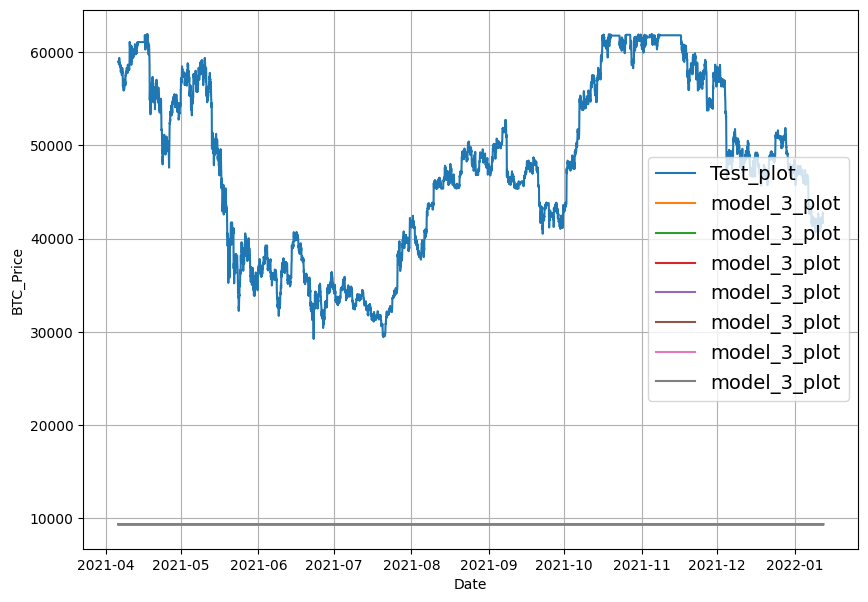

In [ ]:
# Visualising the model

offset=300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test_plot",format="-")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 label="model_3_plot",
                 format="-")

In [ ]:
# NBeats Architecture

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon=horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers

    self.hidden=[tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
    self.theta_layer=tf.keras.layers.Dense(theta_size,activation="linear",name="theta")

  def call(self,inputs):
      x=inputs
      for layer in self.hidden:
        x=layer(x)
      theta=self.theta_layer(x)
      backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
      return backcast, forecast

In [ ]:
dummy_nbeats_block_layer=NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
bitcoin_prices_nbeats=bitcoin_prices.copy()
#bitcoin_prices_nbeats=bitcoin_prices_nbeats.drop(columns=["volume"],axis=1)
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"]=bitcoin_prices_nbeats["Price"].shift(periods=i+1)
  #bitcoin_prices_nbeats[f"open+{i+1}"]=bitcoin_prices_nbeats["open"].shift(periods=i+1)
  #bitcoin_prices_nbeats[f"high+{i+1}"]=bitcoin_prices_nbeats["high"].shift(periods=i+1)
  #bitcoin_prices_nbeats[f"low+{i+1}"]=bitcoin_prices_nbeats["low"].shift(periods=i+1)
  #bitcoin_prices_nbeats[f"volume+{i+1}"]=bitcoin_prices_nbeats["volume"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,open,high,low,Price,volume,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,,,,
2018-01-01 12:30:00,11807.46,11884.81,11400.0,11838.66,292.188777,11838.66,11838.66,11838.66,11838.66,11838.66,11838.66,11838.66
2018-01-01 13:30:00,11807.46,11884.81,11400.0,11838.66,271.813553,11838.66,11838.66,11838.66,11838.66,11838.66,11838.66,11838.66
2018-01-01 14:30:00,11807.46,11884.81,11400.0,11838.66,213.095829,11838.66,11838.66,11838.66,11838.66,11838.66,11838.66,11838.66
2018-01-01 15:30:00,11807.46,11884.81,11400.0,11838.66,169.512196,11838.66,11838.66,11838.66,11838.66,11838.66,11838.66,11838.66
2018-01-01 16:30:00,11807.46,11884.81,11400.0,11838.66,665.334353,11838.66,11838.66,11838.66,11838.66,11838.66,11838.66,11838.66


In [ ]:
X=bitcoin_prices_nbeats.dropna().drop(["Price","open","high","low","volume"],axis=1)
y=bitcoin_prices_nbeats.dropna()["Price"]

split_size=int(len(X)*0.8)
X_train,Y_train=X[:split_size],y[:split_size]
X_test,Y_test=X[split_size:],y[split_size:]

print(len(X_train),len(Y_train),len(X_test),len(Y_test))
X_train[:5],Y_train[:5]

28160 28160 7041 7041


(                      Price+1   Price+2   Price+3   Price+4   Price+5  \
 Date                                                                    
 2018-01-01 12:30:00  11838.66  11838.66  11838.66  11838.66  11838.66   
 2018-01-01 13:30:00  11838.66  11838.66  11838.66  11838.66  11838.66   
 2018-01-01 14:30:00  11838.66  11838.66  11838.66  11838.66  11838.66   
 2018-01-01 15:30:00  11838.66  11838.66  11838.66  11838.66  11838.66   
 2018-01-01 16:30:00  11838.66  11838.66  11838.66  11838.66  11838.66   
 
                       Price+6   Price+7  
 Date                                     
 2018-01-01 12:30:00  11838.66  11838.66  
 2018-01-01 13:30:00  11838.66  11838.66  
 2018-01-01 14:30:00  11838.66  11838.66  
 2018-01-01 15:30:00  11838.66  11838.66  
 2018-01-01 16:30:00  11838.66  11838.66  ,
 Date
 2018-01-01 12:30:00    11838.66
 2018-01-01 13:30:00    11838.66
 2018-01-01 14:30:00    11838.66
 2018-01-01 15:30:00    11838.66
 2018-01-01 16:30:00    11838.66
 Name: 

In [ ]:
train_features_dataset=tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset=tf.data.Dataset.from_tensor_slices(Y_train)

test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(Y_test)


train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

BATCH_SIZE=1024# As per NBeats Paper
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Hyperparameter Tuning of our Nbeats Custom_layer

N_EPOCHS=5000
N_NEURONS=512
N_LAYERS=4
N_STACKS=30

INPUT_SIZE=7 # In paper "lookback" which was given
THETA_SIZE=8

INPUT_SIZE,THETA_SIZE

(7, 8)

In [ ]:
%%time
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# Create stacks of blocks
for i, _ in enumerate(range(1,N_STACKS)): # first stack is already creted

  #Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 1/5000
28/28 [==============================] - 64s 131ms/step - loss: 13360.8330 - mae: 13360.8330 - mse: 2542683648.0000 - val_loss: 5451.5781 - val_mae: 5451.5781 - val_mse: 30867560.0000 - lr: 0.0010
Epoch 2/5000
28/28 [==============================] - 2s 77ms/step - loss: 770.0567 - mae: 770.0567 - mse: 1179196.2500 - val_loss: 649.5721 - val_mae: 649.5721 - val_mse: 631696.7500 - lr: 0.0010
Epoch 3/5000
28/28 [==============================] - 2s 71ms/step - loss: 542.9918 - mae: 542.9918 - mse: 816555.4375 - val_loss: 2394.4175 - val_mae: 2394.4175 - val_mse: 6032184.5000 - lr: 0.0010
Epoch 4/5000
28/28 [==============================] - 2s 64ms/step - loss: 476.3426 - mae: 476.3426 - mse: 516282.1875 - val_loss: 1967.5206 - val_mae: 1967.5206 - val_mse: 4151416.5000 - lr: 0.0010
Epoch 5/5000
28/28 [==============================] - 2s 64ms/step - loss: 237.0707 - mae: 237.0707 - mse: 166556.5469 - val_loss: 1814.4703 - val_mae: 1814.4703 - val_mse: 3532137.7500 - lr: 0.0

In [ ]:
model_7.evaluate(test_dataset)

7/7 [==============================] - 0s 35ms/step - loss: 110.1721 - mae: 110.1721 - mse: 92764.5781


[110.17214965820312, 110.17214965820312, 92764.578125]

In [ ]:
model_7_preds=make_preds(model=model_7,
                         input_data=test_dataset)
model_7_preds[:5]

7/7 [==============================] - 2s 36ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([54173.098, 54119.76 , 54586.383, 55408.938, 56214.906],
      dtype=float32)>

In [ ]:
model_7_results=evaluate_preds(y_true=Y_test,
                               y_pred=model_7_preds)

model_7_results

{'mae': 110.17215,
 'mse': 92764.57,
 'rmse': 304.57275,
 'mape': 0.25477245,
 'mase': 1.0036614}

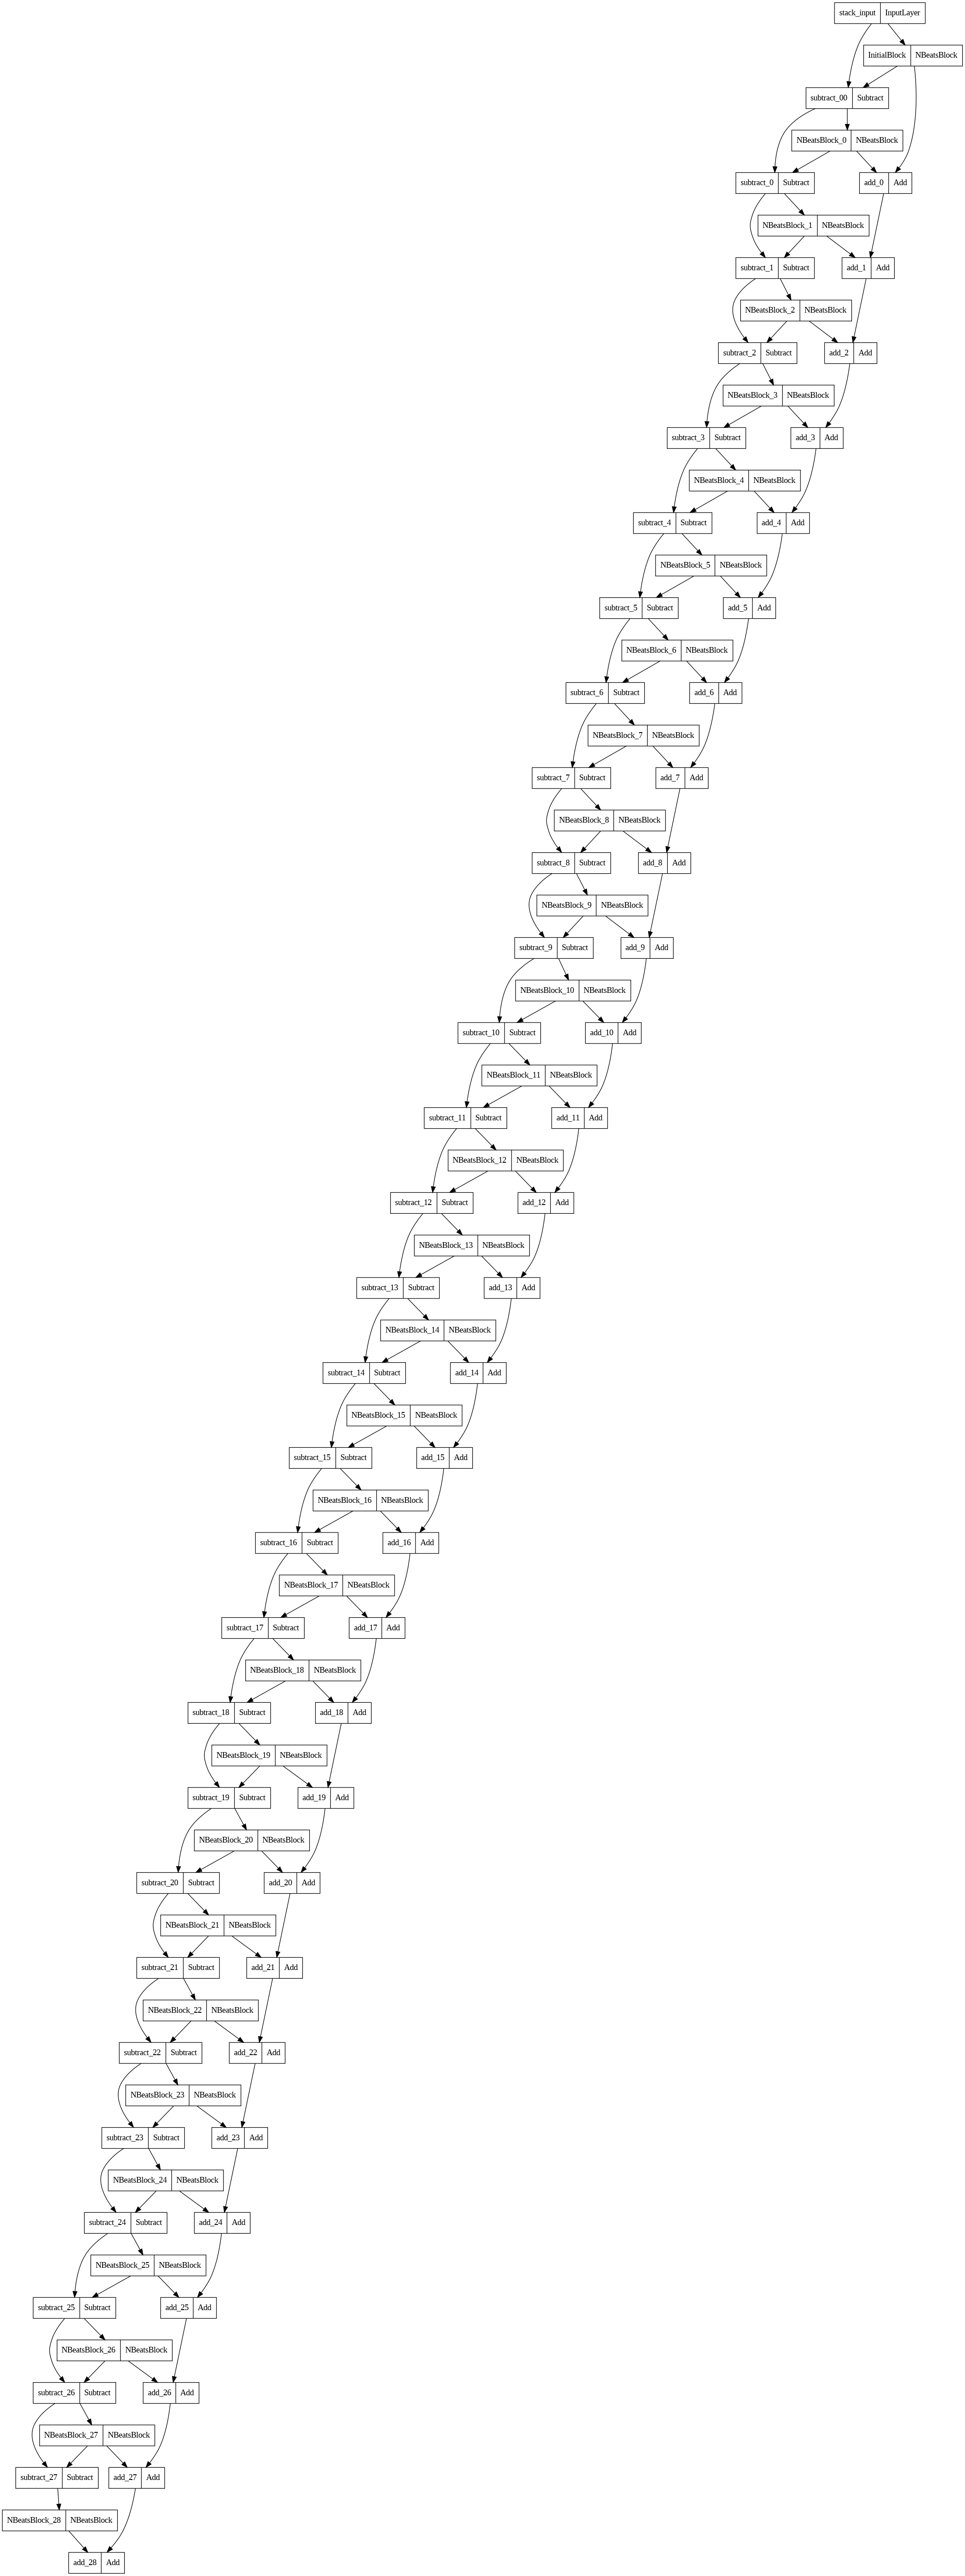

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)